# Bode plot for inverting OPA [gain 1] and [gain 10]

In [38]:
import pandas as pd
from bode_gain_src import *
from uncertainties import umath
import ROOT

# Gain 1

### Read DataFrames

In [22]:
df_data = pd.read_csv("../data-source/inverting_gain_1_data.csv")
df_errors = pd.read_csv("../data-source/inverting_gain_1_errors.csv")

### Convert to arrays of uncertainties

In [24]:
f_arr = pair_dat_err(df_data['f'], df_errors['f'])
ppch1_arr = pair_dat_err(df_data['PPch1'], df_errors['PPch1'])
ppch2_arr = pair_dat_err(df_data['PPch2'], df_errors['PPch2'])

### Calculate Gain

In [35]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))

### Draw Graph

In [68]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")

In [66]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


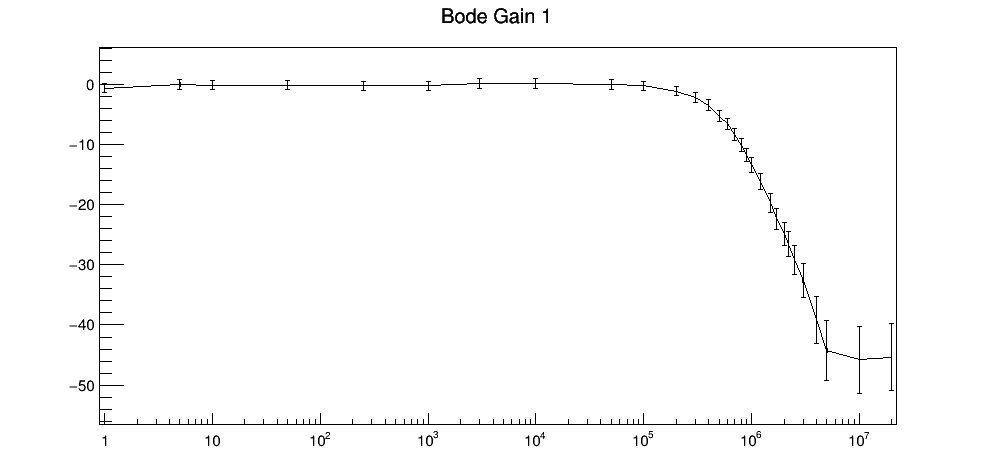

In [67]:
canvas.Draw()
bode_graph_err.Draw()